# Predicting labels from a paragraph of text

### This is a NLP problem where we have to classify the text to different labels/category using algorithms.

### This notebook is divided into different stages which include:
###  1. Loading datasets that is provided and check to see if data are missing.
###  2. Exploratory data analysis is done to look at different category that needs to be devided there are many cases where a single sentence can be categorised into multiple labels.
###  3. Cleaning is done to the data which involves removing
        a) Any hyperlink in the sentence by using cleanHTML function
        b) Any numeric values using keepAlpha function
        c) Any punctuation or special characters using cleanPunc function
###  4. The dataset is split into train and test set and the model to be used for training is decided
###  5. The model trained is then applied on the test set and the accuracy is evaluated.

# Stage 1: Importing necessary libraries and Datasets

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load all the relevant data sets

In [2]:
data_path = "./train_data.csv"
label_path = "./train_label.csv"
test_path = "./test_data.csv"

In [3]:
train_data = pd.read_csv(data_path)
labels_data = pd.read_csv(label_path)
test_data = pd.read_csv(test_path)

### Checking for missing values

In [4]:
missing_values_check = train_data.isnull().sum()
print(missing_values_check)
missing_values_check = labels_data.isnull().sum()
print(missing_values_check)
missing_values_check = test_data.isnull().sum()
print(missing_values_check)

text    0
id      0
dtype: int64
id       0
label    0
dtype: int64
text    0
id      0
dtype: int64


# Checkout some data

In [5]:
print("Number of rows in data =",train_data.shape[0])
print("Number of columns in data =",train_data.shape[1])
print("\n")
print("**Sample data:**")
train_data.head()

Number of rows in data = 41569
Number of columns in data = 2


**Sample data:**


,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065
3,Restore your Porter-Cable sander or polisher t...,165138
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565


In [6]:
print("Number of rows in data =",test_data.shape[0])
print("Number of columns in data =",test_data.shape[1])
print("\n")
print("**Sample data:**")
test_data.head()

Number of rows in data = 10393
Number of columns in data = 2


**Sample data:**


,text,id
0,These machine screw nuts are designed to be us...,114689
1,The M18 FUEL Drill/Driver is the Most Powerful...,183172
2,Steel City 2-Gang 30 cu. in. Square Electrical...,217304
3,Native Collection Plus has Shaw's SilentStep P...,184115
4,Fasade decorative 4 ft. x 8 ft. vinyl wall pan...,103786


In [7]:
print("Number of rows in data =",labels_data.shape[0])
print("Number of columns in data =",labels_data.shape[1])
print("\n")
print("**Sample data:**")
labels_data.head()

Number of rows in data = 75170
Number of columns in data = 2


**Sample data:**


,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified


## Pivoting the labels data

In [8]:
labels_data_pivot = pd.crosstab(labels_data.id, labels_data.label)

## Merging the pivotted Labels data with train data set

In [9]:
df=train_data.join(labels_data_pivot, on='id').sort_values(by='id').reset_index(drop=True)

# Stage 2: Exploratory Data Analysis

In [10]:
categories = list(df.iloc[:,2:].columns.values)

In [11]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of texts'])
df_stats

,category,number of texts
0,Assembly Required,4266
1,Color,4505
2,Commercial / Residential,6866
3,ENERGY STAR Certified,6509
4,Features,3821
5,Finish,3602
6,Flooring Product Type,4422
7,Hardware Included,5471
8,Included,4465
9,Indoor/Outdoor,9420


## Bar Plot to show different labels

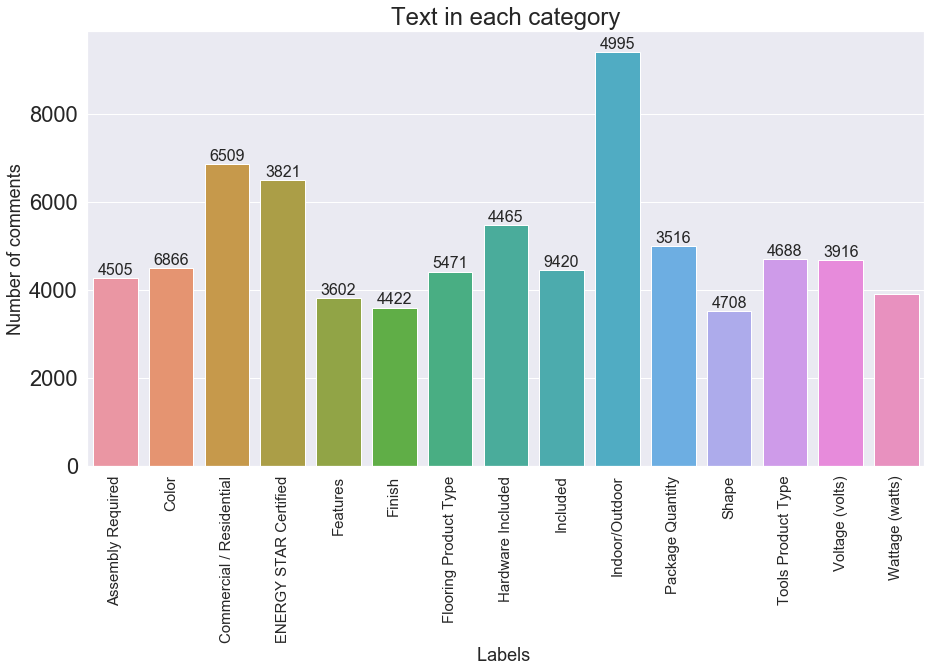

In [12]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, df.iloc[:,2:].sum().values)

#Title of the plot
plt.title("Text in each category", fontsize=24)
# Y-label
plt.ylabel('Number of comments', fontsize=18)
# X-label
plt.xlabel('Labels ', fontsize=18)

# Rotating the X-label values to 90 degrees for easy understanding
plt.xticks(rotation='vertical', fontsize=15)
#adding the text labels
rects = ax.patches
labels = df.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.show()

## Bar Plot to show multiple labels

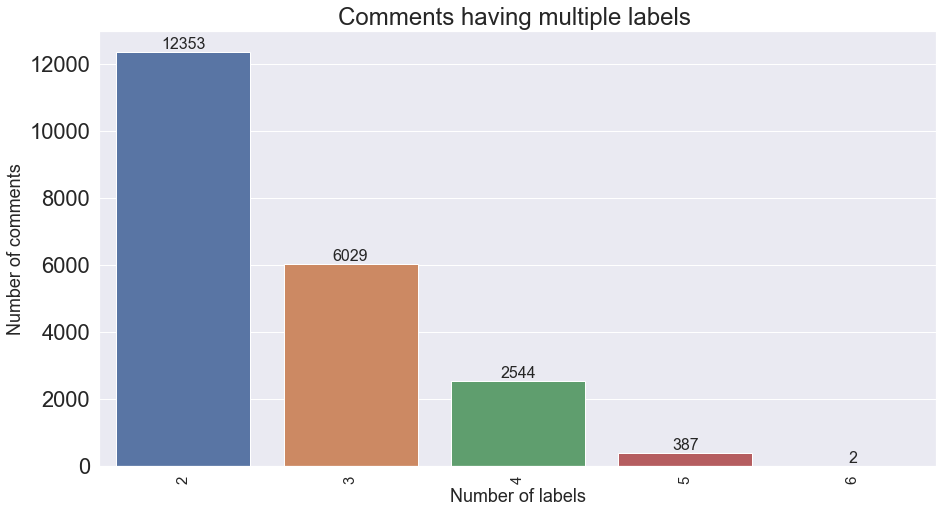

In [13]:
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

# Title of the plot
plt.title("Comments having multiple labels ")

#Y-Label
plt.ylabel('Number of comments', fontsize=18)

#X-Label
plt.xlabel('Number of labels', fontsize=18)

# Rotating X-label values to 90degree
plt.xticks(rotation='vertical', fontsize=15)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.show()

### Showing the words that is frequently occured

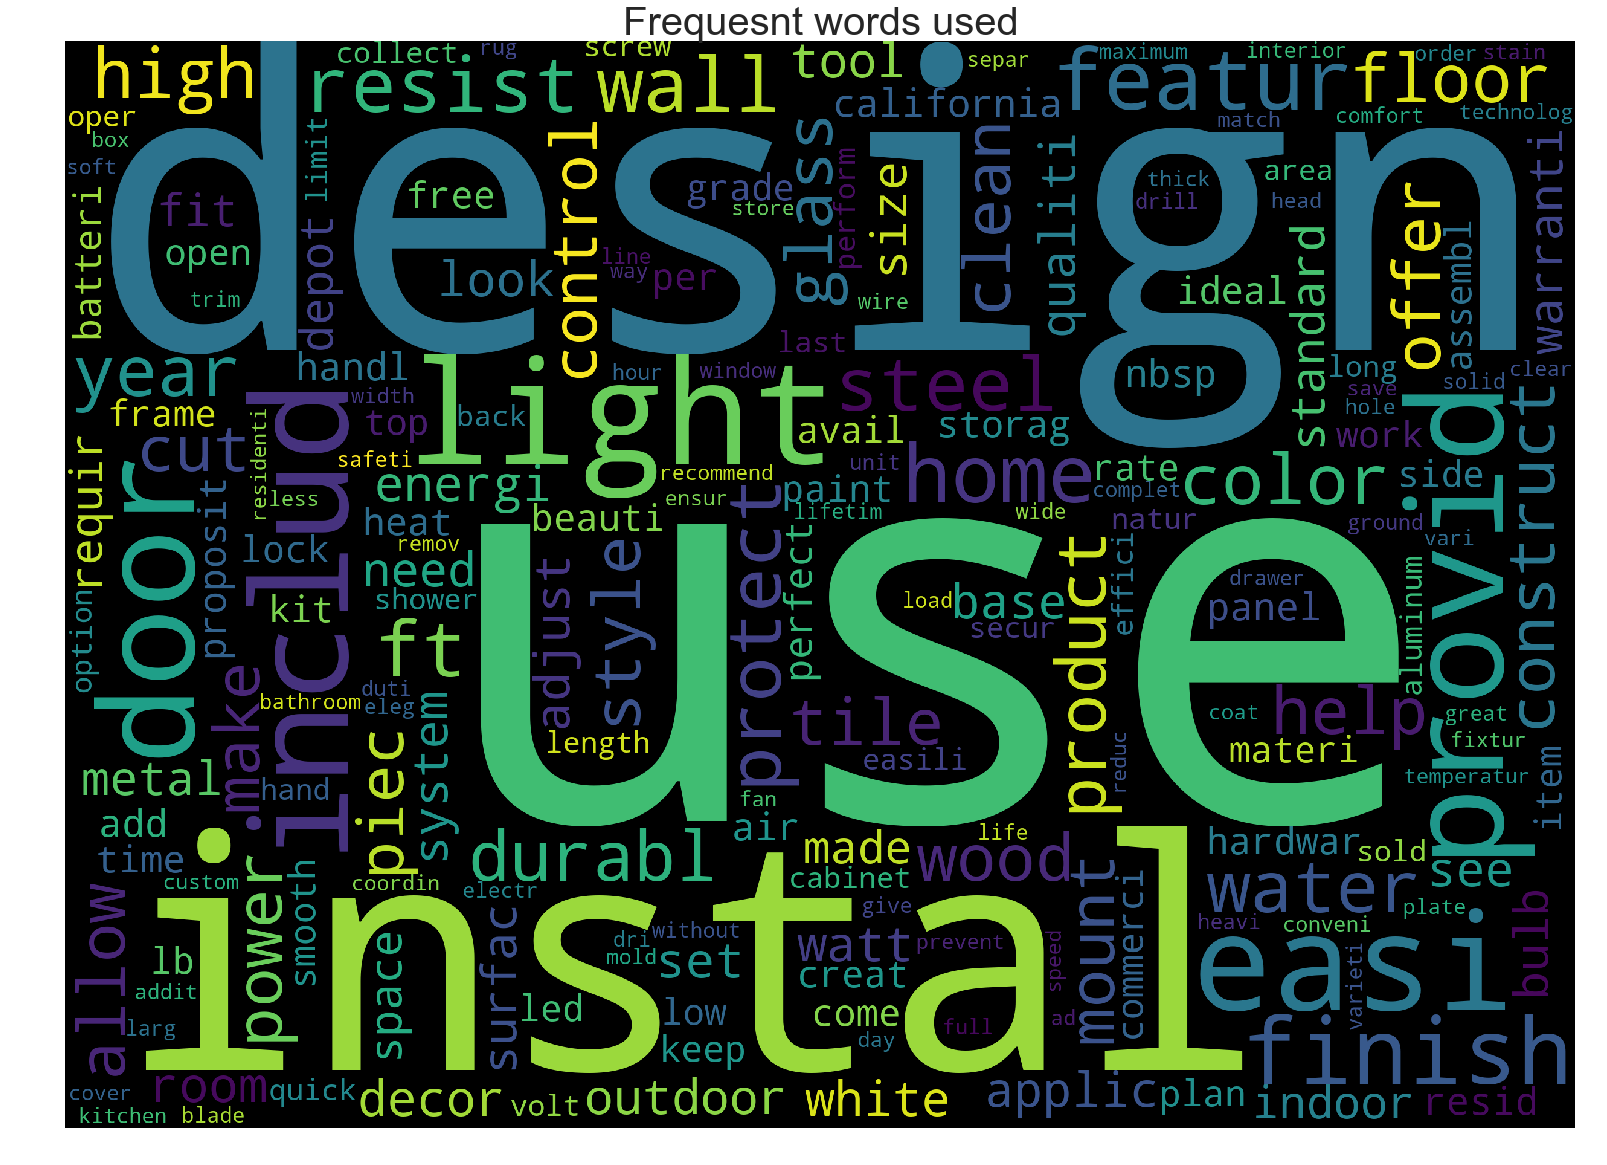

In [47]:
from wordcloud import WordCloud,STOPWORDS
# Initialising the figure to show the words that appear
plt.figure(figsize=(35,20))

# clean
text = df.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Frequent words used",fontsize=40)
plt.imshow(cloud_toxic)

# Stage 3: Data Cleaning

In [15]:
#importing nltk library
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import warnings
import sys

### Remove any punctuation or special characters

In [16]:
data = df
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# cleanHTML is a function defined to remove the link from the sentence
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

# cleanPunc is a function defined to remove the punctuation or special characters
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

# keepAlpha is a function defined to remove the aplha numeric words
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

### Removing Stopwords

In [17]:
stop_words = set(stopwords.words('english'))

# Stop words are the words after which a comma has to be used so removeStopwords is used to remove that
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

### Perform Stemming

In [18]:
stemmer = SnowballStemmer("english")

# Stemming means it converts the word to its originated or root wod
# For example played, playing, pays are all converted to play
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

## Pre-Processing Training data

In [19]:
# Now for the dataset all the function defined to clean the data is performed below
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(cleanHtml)
data['text'] = data['text'].apply(cleanPunc)
data['text'] = data['text'].apply(keepAlpha)
data['text'] = data['text'].apply(removeStopWords)
data['text'] = data['text'].apply(stemming)

# Stage 4: Split the train data into train and test split to build and verify the model

In [42]:
# Train and test data are split with test dataset being 30% of that of training data set.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

In [43]:
train_text = train['text'].reset_index(drop=True)
test_text = test['text'].reset_index(drop=True)

# Stage5: Training and Predicting the model used

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','text'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','text'], axis=1)

In [23]:
!{sys.executable} -m pip install scikit-multilearn

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
predicted=pd.DataFrame()
for category in categories:
    print('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    predicted[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(predicted[category], prediction)))
    print("\n")

**Processing Assembly Required ...**
Test accuracy is 1.0


**Processing Color ...**
Test accuracy is 1.0


**Processing Commercial / Residential ...**


KeyboardInterrupt: 

## Pre-Processing Test Data

In [25]:
test_data['text'] = test_data['text'].str.lower()
test_data['text'] = test_data['text'].apply(cleanHtml)
test_data['text'] = test_data['text'].apply(cleanPunc)
test_data['text'] = test_data['text'].apply(keepAlpha)
test_data['text'] = test_data['text'].apply(removeStopWords)
test_data['text'] = test_data['text'].apply(stemming)

In [26]:
train_text = data['text'].reset_index(drop=True)
test_text = test_data['text'].reset_index(drop=True)

## Predicting on the test data

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = data.drop(labels = ['id','text'], axis=1)
x_test = vectorizer.transform(test_text)
# y_test = test_data.drop(labels = ['id','text'], axis=1)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    #test_data[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test_data[category], prediction)))
    print("\n")

**Processing Assembly Required ...**
Test accuracy is 1.0


**Processing Color ...**


KeyboardInterrupt: 

In [31]:
test_data.to_csv('final.csv', index = None, header=True)